<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

  

# Analisando a Violência no Rio de Janeiro

<center><image width = 35% src = 'https://images.unsplash.com/photo-1564659907532-6b5f98c8e70f?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=677&q=80'></center>

Que o Cristo Redentor se tornou o símbolo da cidade do Rio de Janeiro não é segredo para ninguém, porém há um outro fator que, infelizmente, está se tornando característica da cidade: a criminalidade. O Rio de Janeiro é um município que apresenta um dos maiores índices de criminalidade do Brasil. 

Diante da preocupação em relação a criminalidade do Rio esse *notebook* foi feito com o intuito de fazer algumas análises a cerca da criminalidade no estado utilizando dados abertos, obtidos através da iniciativa do [portal ISPDaddos](http://www.ispdados.rj.gov.br/). 

## Obtenção dos Dados


Os dados obtidos foram provenientes do Portal ISPDados, página de Dados Abertos do Instituto de Segurança Pública. 

Na página é possível acessar bases de dados de registros criminais e da atividade policial do estado do Rio de Janeiro. O site possui diversas estatísticas, elas são construídas a partir dos Registros de Ocorrência (RO) feito nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL). Os dados antes de serem consolidadeos no ISP passam por um controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL).

Todos os dados do site estão de acordo com a Lei de Acesso a Informação e tem o objetivo de fornecer ao cidadão maior transparência das informações. 

O arquivo `csv` pode ser baixado diretamente através [deste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados

A importação dos dados será feita utilizando a Biblioteca Pandas, para saber mais sobre ela acesse [esse notebook](https://github.com/renatagsr/Data-Science-na-Pratica/blob/main/Manipulando%20e%20Explorando%20Dados/Introdu%C3%A7%C3%A3o_ao_Pandas.ipynb) e a [documentação oficial](https://pandas.pydata.org/docs/).

In [1]:
#Importar pacotes necessários
import pandas as pd

#Importar Dataset
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Antes de qualquer exploração dos dados é necessário fazer uma análise inicial para saber como os dados são apresentados. 

O primeiro ponto a ser conhecido é o tamanho do *DataFrame*.


In [2]:
#Tamanho do Data Frame
print(f'''Informações de tamanho do Dataset.

Linhas: {df.shape[0]}
Colunas: {df.shape[1]}''')

Informações de tamanho do Dataset.

Linhas: 344
Colunas: 56


Outro ponto importante é conhecer quais são as colunas que estão presentes no conjunto de dados, para que assim tenha uma noção de qual análise pode ser feita em cima de cada uma delas.

In [3]:
#Verificando nomes das colunas
print(f'''As colunas presentes no Dataset são:

{df.columns}''')

As colunas presentes no Dataset são:

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv'

Sabendo quais são as colunas existentes se faz necessário saber qual o tipo de cada uma delas. Essa informação facilitará a etapa de limpeza de dados.

In [4]:
#Verificando tipo das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Nota-se que todas as variáveis presentes no *Dataset* analisado são numéricas, inteiras (`int`) ou do tipo ponto flutuante (`float`).

Visualizar como os dados aparecem no *Dataset* ajuda a ter uma maior noção sobre cada uma das colunas e o que pode ser feito com elas.

In [5]:
#Visualizando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Algo que não pode faltar na análise inicial dos dados é conhecimento sobre a presença de dados nulos no conjunto de dados, porque caso haja dados faltantes é necessário que se pense o que será feito sobre esse fato.

Só de observar as primeiras entradas percebe-se que há diversas colunas com células que não possuem números (NaN), isso mostra que realmente é necessário analisar a quantidade de dados ausentes.

In [6]:
#Porcentagem de dados nulos
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Percebe-se que há muitas colunas com valores ausentes, sendo que as colunas referentes a bicicleta tem um maior destaque em relação a essa falta. Algumas teorias podem ser levantadas sobre o motivo de não ter dados em determinadas colunas:

* Os dados são registrados desde 1991, isso leva a pensar que nem todos os crimes eram contabilizados desde o começo. Não quer dizer que os dados não existem, mas que antes não era feita a contagem deles.
* O Brasil, infelizmente, ainda deixa a desejar quando se fala em cultura de dados. Isso leva a pensar que nem todos os dados eram organizados da forma correta, pode ter havido perda de informação com o passar dos anos (antes de haver a organização desse conjunto de dados), forma desorganizada de categorizar os dados, entre outros pontos. 

## Trabalhando com a Ausência dos Dados

Uma pesquisa e uma análise no *Dataset* permitiram a descoberta de que a partir de 2005 não há nenhuma coluna com dado ausente, visto que de 2007 até o último ano que há informações no conjunto de dados, 2019, há uma faixa de 14 anos que é algo bem considerável para se fazer análises. Portanto, será criada uma cópia do *Dataset* onde os dados considerados serão apenas a partir de 2005.

As únicas colunas que não possui dados completos a partir de 2005 são "roubo_bicicleta" e "furto_bicicleta", elas só possuem dados a partir do ano de 2013.

In [7]:
df_clean = df[df['vano'] > 2005]

In [8]:
df_clean.isnull().sum()

vano                           0
mes                            0
hom_doloso                     0
lesao_corp_morte               0
latrocinio                     0
hom_por_interv_policial        0
tentat_hom                     0
lesao_corp_dolosa              0
estupro                        0
hom_culposo                    0
lesao_corp_culposa             0
roubo_comercio                 0
roubo_residencia               0
roubo_veiculo                  0
roubo_carga                    0
roubo_transeunte               0
roubo_em_coletivo              0
roubo_banco                    0
roubo_cx_eletronico            0
roubo_celular                  0
roubo_conducao_saque           0
roubo_apos_saque               0
roubo_bicicleta               96
outros_roubos                  0
total_roubos                   0
furto_veiculos                 0
furto_transeunte               0
furto_coletivo                 0
furto_celular                  0
furto_bicicleta               96
outros_fur

In [9]:
df_clean.set_index(['vano'], inplace=True)

## Informações Estatísticas da Violência no Rio de Janeiro

Visto que os dados presentes no dataset são numéricos é de grande importância que tenha informações estatísticas sobre eles, para a obtenção delas será utilizado o método `describre()` que gera um resumo das principais informações de cada uma das colunas numéricas.

Esse método será útil para:

* Ajudar na identificação de *outliers*
* Entender como os dados estão distribuidos, assim como saber se estão corretamente distribuidos.
* Ter noção dos primeiros e últimos dados. 

In [10]:
#Resumo estatístico 
df_clean.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,6.402439,420.945122,3.591463,14.871951,78.384146,421.170732,6385.243902,395.914634,190.365854,3265.701220,...,448.237805,44.914634,3.054878,1.829268,0.317073,517.792683,7578.359756,2728.329268,60292.024390,2.987805
std,3.442284,75.346419,2.135916,5.657023,38.058302,88.952363,972.908788,81.723565,35.787893,641.898633,...,65.983439,14.632262,2.174174,1.537306,0.624216,97.188608,2236.052163,939.434199,6626.499143,0.110092
min,1.000000,272.000000,0.000000,5.000000,15.000000,268.000000,2521.000000,222.000000,111.000000,848.000000,...,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,1413.000000,31231.000000,2.000000
25%,3.000000,363.500000,2.000000,11.000000,45.750000,345.000000,5676.500000,337.000000,160.750000,2861.500000,...,400.000000,36.000000,1.000000,1.000000,0.000000,440.750000,5830.250000,2015.000000,54961.750000,3.000000
50%,6.000000,411.500000,3.000000,14.000000,75.000000,405.500000,6361.000000,404.500000,185.500000,3385.500000,...,442.500000,44.000000,3.000000,2.000000,0.000000,513.500000,6995.500000,2505.500000,61295.500000,3.000000
75%,9.000000,475.000000,5.000000,18.000000,102.000000,491.000000,7104.000000,456.250000,216.250000,3736.000000,...,497.000000,51.250000,4.000000,3.000000,0.000000,589.250000,9182.500000,3200.000000,65594.000000,3.000000
max,12.000000,640.000000,10.000000,30.000000,194.000000,645.000000,9050.000000,561.000000,299.000000,4313.000000,...,628.000000,100.000000,13.000000,7.000000,3.000000,781.000000,13833.000000,5358.000000,75403.000000,3.000000


### Roubo e furto de Veículos 

Um crime muito comum é o de roubo ou furto de veículos, por isso essa sessão será dedicada exclusivamente a análise dos dados referentes a esse crime no Rio de Janeiro.

In [11]:
#Média da variável roubo_veiculo
media_roubo_veiculo = df_clean['roubo_veiculo'].mean()
print(f'A média de roubos de veículos no Rio de Janeiro é de {media_roubo_veiculo:.2f}.')

A média de roubos de veículos no Rio de Janeiro é de 2728.33.


Percebe-se que a média de roubo de veículos é de 2448.70 por mês. Mesmo o Rio de Janeiro sendo bem grande, esse média de roubos é um valor alto. Segundo pesquisas em 2019 o estado foi o com maior número de roubos de veículos do Brasil.


In [12]:
#Média da variável furto_veiculo
media_furto_veiculo = df_clean['furto_veiculos'].mean()
print(f'A média dos furtos de veículos no Rio de Janeiro é de {media_furto_veiculo:.2f}.')

A média dos furtos de veículos no Rio de Janeiro é de 1513.73.


O número de furtos de veículos no Rio de Janeiro é inferior ao número de roubos, mas ainda altos, totaliza uma média de 1674,67. Esse fato nos leva a pensar que realmente é a violência que prevalece no estado, porque quando um veículo é furtado a pessoa não vê o ato, ao contrário de quando é roubado.

In [13]:
#Média da variável recuperaca_veiculos
media_recuperacao_veiculo = df_clean['recuperacao_veiculos'].mean()
print(f'A média dos veículos que são recuperados no Rio de Janeiro é de {media_recuperacao_veiculo:.2f}.')

A média dos veículos que são recuperados no Rio de Janeiro é de 2036.91.


Para fazer o cálculo da porcentagem de veículos que são recuperados será utilizada a seguinte fórmula:

* $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

Saber quantos veículos são recuperados e quantos são roubados/furtados é de grande importância para que o governo possa saber se precisa melhorar as medidas de segurança ou se pode manter.

In [14]:
#Porcentagem de veiculos recuperados
total_veiculos_roubados = media_furto_veiculo + media_roubo_veiculo
porcentagem_recuperados = media_recuperacao_veiculo/total_veiculos_roubados*100
print(f'Do total de {total_veiculos_roubados:.2f} veículos que são roubados ou furtados, {porcentagem_recuperados:.2f}% são recuperados.')

Do total de 4242.05 veículos que são roubados ou furtados, 48.02% são recuperados.


De todos os veículos que são retirados da propriedade do seu dono menos de 43% deles são recuperados, esse fato juntamente com o alto número de roubos/furtos por mês leva a pensar que é necessário haver melhoria no sistema de segurança do estado do Rio de Janeiro. Enquanto não há mudanças, infelizmente, a população viverá em constante alerta.

### Crimes Hediondos

Crimes hediondos são aqueles descritos como algo sórdido, depravado, que provoca grande indignação moral, causando horror e repulsa. É utilizado, frequentemente, quando são crimes que ferem a dignidade humana, causando grande comoção e reprovação da sociedade.

Os crimes Hediondos segundo o artigo 1º da lei 8.072/90 são os seguintes:

* Homicídio;
* Lesão corporal dolosa de natureza gravíssima e lesão corporal seguida de morte;
* Latrocínio (roubo seguido de morte);
* Extorsão qualificada pela morte;
* Extorsão mediante sequestro e na forma qualificada;
* Estupro de vulnerável;
* Epidemia com resultado morte;
* Falsificação, corrupção, adulteração ou alteração de produto destinado a fins terapêuticos ou medicinais;
* Favorecimento da prostituição ou de outra forma de exploração sexual.

Dentre os crimes hediondos há alguns que são listados no conjunto de dados que está sendo analisado, visto a gravidade de tais crimes eles serão analisados para que se saiba o quanto esses crimes têm ocorrido no estado do Rio de Janeiro.

#### Crimes contra a vida

O primeiro crime hediondo que será analisado serão os contra a vida, homicídios. 

In [15]:
#Valores máximos e mínimos de homícidio doloso
min_homicidio_doloso = df_clean['hom_doloso'].min()
print(f'O número mínimo de homicídios dolosos foi de {min_homicidio_doloso}.')
max_homicidio_doloso = df_clean['hom_doloso'].max()
print(f'Já o número máximo foi de {max_homicidio_doloso}.')

O número mínimo de homicídios dolosos foi de 272.
Já o número máximo foi de 640.


Um primeiro ponto é saber que há diferença entre homicídio doloso e culposo.

**Doloso**: Quando o praticante teve intenção de matar.

**Culposo**: Quando há vítima fatal, mas não teve intenção de matar.

Sabendo isso e analisando que o número mínimo de homicídio com intenção de matar que houve em um mês foi de 272, percebe-se o quão grave é a situação. Foram, no mínimo, 272 vidas tiradas intencionalmente. 

In [16]:
#Mês com menor número de homicídios dolosos
df_clean[df_clean['hom_doloso'] == 272]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,
2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,...,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [17]:
#Mês com maior número de homicídios dolosos
df_clean[df_clean['hom_doloso'] == 640]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,
2007,3,640,8.0,22,111.0,408,7134,289.0,233.0,3235.0,...,474.0,100,11.0,6.0,1.0,781,6547,3348,56991.0,3


Com as duas análises acima descobre-se que em Janeiro de 2007 foi o mês que houve mais homicídios dolosos e que em Junho de 2015 foi o mês que possuiu menor número. 

Essas informações sugerem que talvez o número de homicídios dolosos esteja diminuindo com o passar dos anos. 

#### Homiicídios Culposos

O número de assassinatos intencionais, infelizmente, é bem alto. Será que o número de homicídios culposos também?

Os homicídios culposos considerados aqui são os por morte em trânsito, como por exemplo atropelamento e colisão, eles não são considerados hediondos, mas vale a pena analisar e ver a diferença em relação aos dolosos.

In [18]:
#Valores máximos e mínimos de homícidio culposo
min_homicidio_doloso = df_clean['hom_culposo'].min()
print(f'O número mínimo de homicídios culposo foi de {min_homicidio_doloso}.')
max_homicidio_doloso = df_clean['hom_culposo'].max()
print(f'Já o número máximo foi de {max_homicidio_doloso}.')

O número mínimo de homicídios culposo foi de 111.0.
Já o número máximo foi de 299.0.


Analisando os números máximos e mínimos dos homicídios culposos percebe-se que o número é bem menor do que o doloso, sendo que o número mínimo de homicídios culposos foi de 111 e o máximo de 299. O número máximo é mais de 2 vezes menor do que o número máximo de homicídios dolosos.

#### Sequestro

O Sequestro é o ato de alguém privar outra pessoa (ou mais) ilicitamente da sua privacidade, mantendo-a onde ela não pode livremente sair. Esse crime tem pena de um a três anos, podendo ter seu tempo aumentado dependendo da forma que e da gravidade do sequestro. Normalmente, os sequestros são feitos como uma forma de extorsão, ou seja, uma forma de coagir a pessoa sequestrada ou alguém que essa pessoa importa a fim de conseguir alguma vantagem, normalmente financeira.

O sequestro relâmpago é aquele que a vítima é privada da sua liberdade por um curto espaço de tempo com intuito de conseguir alguma vantagem econômica indevida.

In [19]:
df_sequestro = df_clean.groupby(df_clean.index).sum()['sequestro'] + df_clean.groupby(df_clean.index).sum()['sequestro_relampago']
df_sequestro

vano
2006     79.0
2007     47.0
2008     71.0
2009     89.0
2010     95.0
2011    153.0
2012    132.0
2013    120.0
2014    169.0
2015    137.0
2016     81.0
2017    119.0
2018    111.0
2019     67.0
dtype: float64

Olhando os dados numéricos percebe-se que a quantidade de pessoas sequestradas ao longo dos anos é variável e manteve o seu valor mais elevado de 2011 até 2015, depois houve uma queda, mas ainda não foi algo tão grande. O ano que teve menor número de sequestros foi o de 2007. Tais informações ficarão melhor evidenciadas em um gráfico que será feito posteriormente.

#### Lesão Corporal Seguida de Morte

A lesão corporal seguida de more é considerada um crime preterdoloso¹, ou seja, o agente possui um dolo na ação (lesionar) e culpa no resultado. A lesão ocasionada não tinha intenção de matar, em princípio a intenção era só de lesionar e acaba causando a morte por imprudência ou negligencia. 

¹Em direito, crime preterdoloso caracteriza-se quando o agente pratica uma conduta dolosa, menos grave, porém obtém um resultado danoso mais grave do que o pretendido, na forma culposa

In [63]:
df_lesao_morte = df_clean.groupby(df_clean.index).sum()['lesao_corp_morte'] 
df_lesao_morte.sort_values(ascending=False)

vano
2018    56.0
2016    56.0
2006    55.0
2010    50.0
2008    45.0
2009    44.0
2007    44.0
2014    41.0
2011    40.0
2017    39.0
2013    39.0
2015    32.0
2019    24.0
2012    24.0
Name: lesao_corp_morte, dtype: float64

In [65]:
df_lesao_morte

vano
2006    55.0
2007    44.0
2008    45.0
2009    44.0
2010    50.0
2011    40.0
2012    24.0
2013    39.0
2014    41.0
2015    32.0
2016    56.0
2017    39.0
2018    56.0
2019    24.0
Name: lesao_corp_morte, dtype: float64

Os anos que mais tiveram lesões corporais seguidas de morte foram 2018, 2016 e 2006, sendo que foram 56, 56 e 55 mortes, respectivamente.

## Visualização de Dados

Uma forma que facilita a análise e a conclusão de alguns fatos é a utilização de gráficos. O primeiro gráfico que será plotado será o histograma porque ele proporciona um maior entendimento em relação a distribuição dos valores de uma determinada variável. 

Como é desejado obter algumas informações mais aprofundadadas em relação aos homícidios dolosos, essa que será a variável analisada.

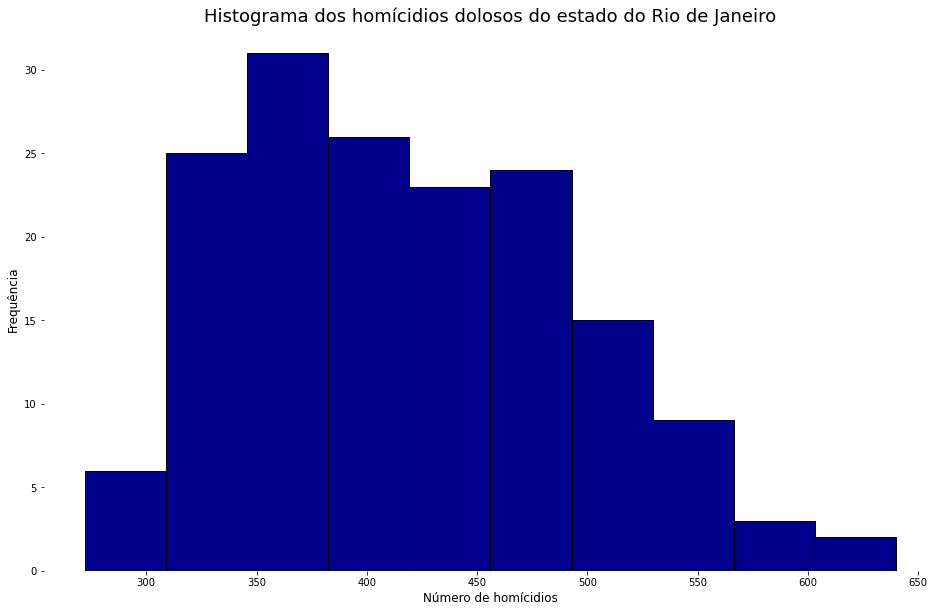

In [28]:
#Importar biblioteca
import matplotlib.pyplot as plt

#Plotar histogram de hom_doloso
fig, ax = plt.subplots(figsize = (16, 10))
ax.hist(df_clean['hom_doloso'], edgecolor = 'black', color = 'darkblue')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Histograma dos homícidios dolosos do estado do Rio de Janeiro', fontsize = 18)
ax.set_xlabel('Número de homícidios', fontsize = 12)
ax.set_ylabel('Frequência', fontsize = 12);

Pontos que chamam atenção no histograma:

* Cerca de 70 meses tiverem 500 homícidios dolosos, um número muito elevado de meses;
* Felizmente, poucos meses apresentaram 800 homícidios, foram menos de 10 meses;
* Após 500 homícidios a quantidade de meses que houveram tal número homícidios diminui;
* Infelizmente, menos de 20 meses apresentam o menor número de homícidios.

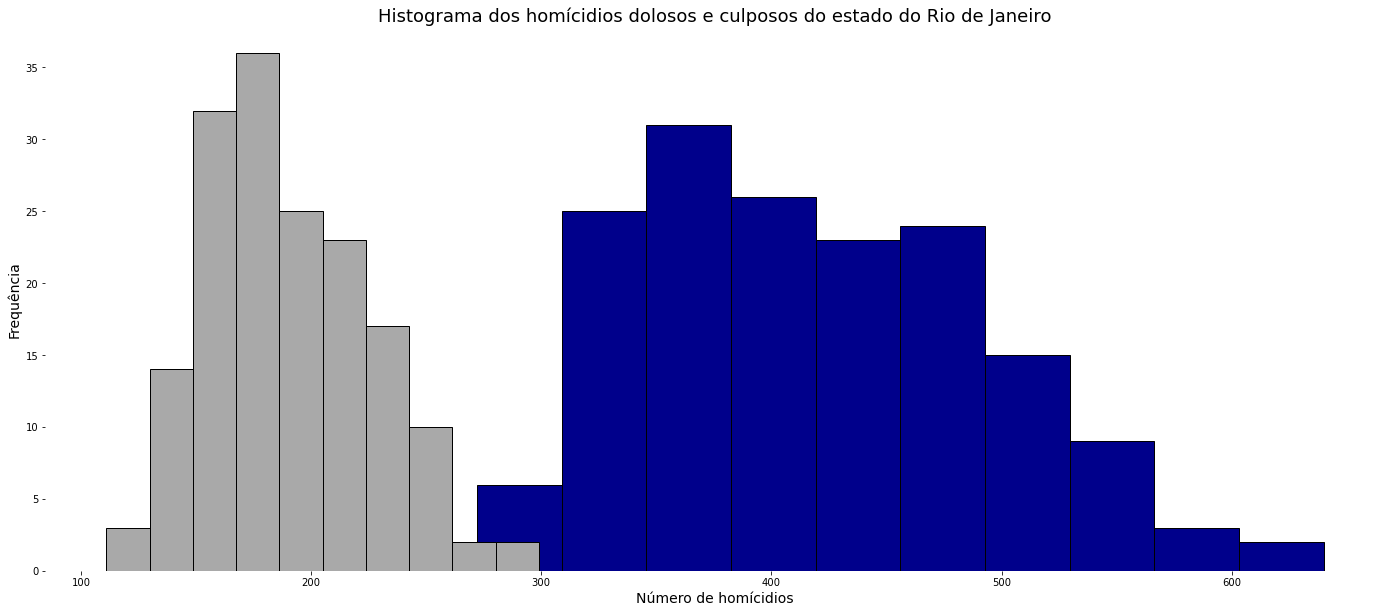

In [29]:
#Plotar histograma de hom_doloso
fig, ax = plt.subplots(figsize = (24, 10))
ax.hist(df_clean['hom_doloso'], edgecolor = 'black', color = 'darkblue')
ax.hist(df_clean['hom_culposo'], edgecolor = 'black', color = 'darkgray')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Histograma dos homícidios dolosos e culposos do estado do Rio de Janeiro', fontsize = 18)
ax.set_xlabel('Número de homícidios', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14);

Analisando os histogramas de homicídio culposo (cinza) e doloso (azul) é perceptível a discrepância da frequência de mortes, o número de mortes com intenção de matar (dolosa) é muito maior do que o sem intenção. Percebido isso, é necessário a ação mais intensa em cima da criminalidade mesmo e menos intensa, mas recorrentes, em cima de medidas que evitem acidentes de trânsito.

#### Sequestro

In [30]:
def annotate(value, year, position):
    return plt.annotate(round(value, 0), (year - 0.2, value + position), fontsize = 14)

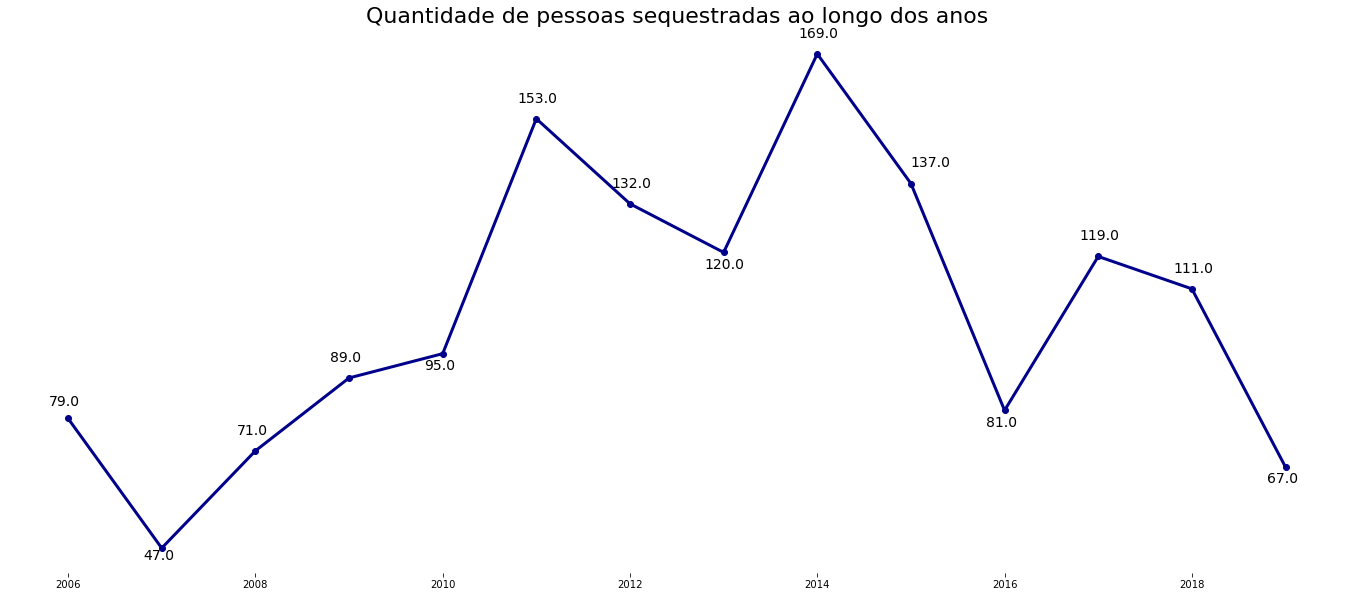

In [31]:
#Plotar gráfico de linhas de sequestros
fig, ax = plt.subplots(figsize = (24, 10))
ax.plot(df_sequestro, color = 'darkblue', linewidth=3, marker = 'o')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Quantidade de pessoas sequestradas ao longo dos anos', fontsize = 22)
annotate(df_sequestro.values[0], 2006, 3)
annotate(df_sequestro.values[1], 2007, -3)
annotate(df_sequestro.values[2], 2008, 4)
annotate(df_sequestro.values[3], 2009, 4)
annotate(df_sequestro.values[4], 2010, -4)
annotate(df_sequestro.values[5], 2011, 4)
annotate(df_sequestro.values[6], 2012, 4)
annotate(df_sequestro.values[7], 2013, -4)
annotate(df_sequestro.values[8], 2014, 4)
annotate(df_sequestro.values[9], 2015+0.2, 4)
annotate(df_sequestro.values[10], 2016, -4)
annotate(df_sequestro.values[11], 2017, 4)
annotate(df_sequestro.values[12], 2018, 4)
annotate(df_sequestro.values[13], 2019, -4)
plt.gca().axes.get_yaxis().set_visible(False);

Com o gráfico fica mais fácil de ver os anos que estavam em queda e os que tiveram maior número de sequestro. Conforme dito anteriormente, os numéros de sequestros são variáveis. Um ponto importante a ser notado é que desde 2017 a quantidade de pessoas sequestradas está diminuindo, a esperança é que essa queda permaneça ou que, pelo menos, estabilize..

#### Lesão Corporal Seguida de Morte

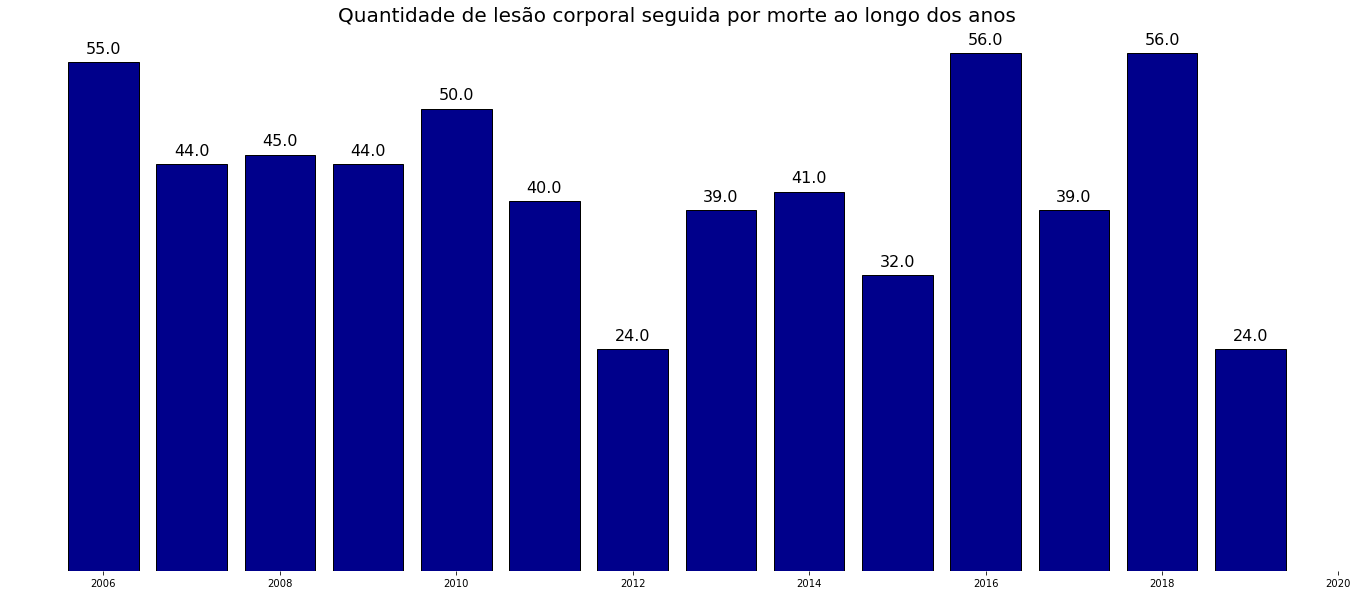

In [66]:
#Plotar histogram de hom_doloso
fig, ax = plt.subplots(figsize = (24, 10))
ax.bar(df_lesao_morte.index, height=df_lesao_morte, edgecolor = 'black', color = 'darkblue')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Quantidade de lesão corporal seguida por morte ao longo dos anos', fontsize = 20)
for i in range(len(df_lesao_morte)):
    plt.annotate(str(df_lesao_morte.values[i]), (df_lesao_morte.index[i], df_lesao_morte.values[i]+ 1.5), ha = 'center', va = 'center', color = 'black', fontsize=16)
plt.gca().axes.get_yaxis().set_visible(False);

Ao utilizar o gráfico de barras percebe-se que poucos anos tiveram valores mais destoantes, 2012, 2015 e 2019, os demais se mantiveram com uma variação menor.

#### Roubos

Agora será analisado a progressão de roubos durante o período do *dataset*. O gráfico de linhas é ótimo para saber é excelente para ver essa progressão.

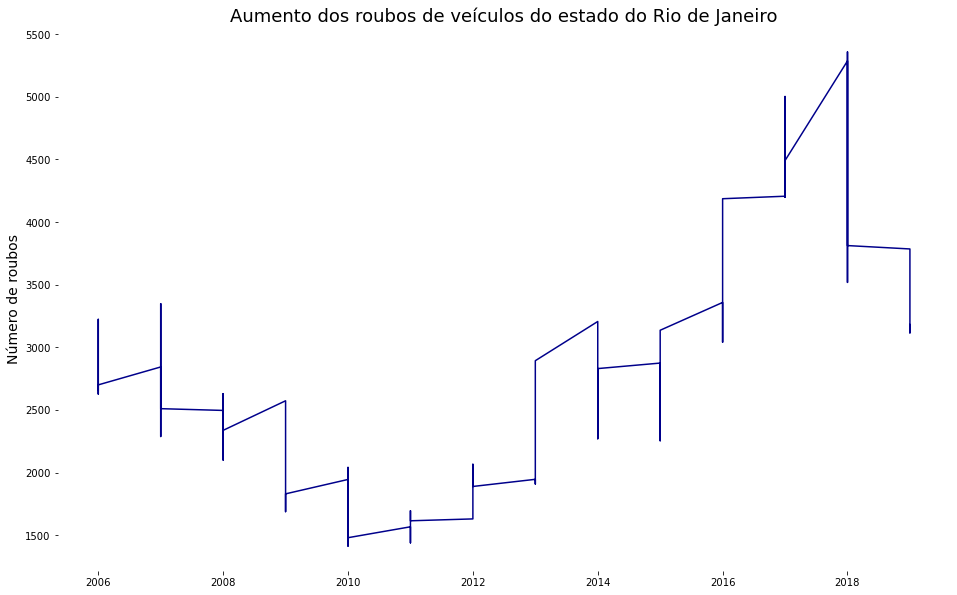

In [22]:
#Plotar histogram de roubo_veiculo
fig, ax = plt.subplots(figsize = (16, 10))
ax.plot(df_clean['roubo_veiculo'], color = 'darkblue')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Aumento dos roubos de veículos do estado do Rio de Janeiro', fontsize = 18)
ax.set_ylabel('Número de roubos', fontsize = 14);

Percebe-se que o número de roubos de veículos ao longo dos anos vem sofrendo um aumento, houve uma queda apenas em 2010, mas logo após esse ano começou aumentar novamente e de uma forma até alarmante.


## Conclusão

Embora não tenha sido uma análise muito aprofundada já é perceptível que a violência no Rio de Janeiro é realmente elevada e que algumas medidas de segurança precisam ser tomadas o quanto antes. É recomendado que se faça uma análise mais aprofundada utilizando outras fontes de informação para que complemente os dados do dataset utilizado, pois assim será possível obter respostas ainda mais conclusivas e até mesmo gerar ideias de possíveis soluções para a violência no Rio de Janeiro.